Crear un modelo de aprendizaje automático (ML) para un conjunto de datos de Alzheimer puede ser un proceso desafiante pero gratificante. Aquí te presento una introducción general a los pasos que podrías seguir:

1. **Comprensión del problema**: El primer paso es entender el problema que estás tratando de resolver. En nuestro, a paritir de un conjunto de datos de Alzheimer, nos interesa  predecir el diagnóstico de un paciente basándonos en una serie de características, como los resultados de pruebas cognitivas, factores genéticos , demográficos y edad

2. **Análisis exploratorio de datos**: Este paso implica explorar y entender tus datos. . Esto implico la creación de gráficos, el cálculo de estadísticas descriptivas y la comprobación de la existencia de valores atípicos o faltantes.

3. **Preprocesamiento de datos**: en esta etapa en funcion del análisis exploratorio, tal vez se necesitaria limpiar tus datos, impliccara correcion de valores faltantes, y la transformación de variables para mejorar su utilidad para el modelado.

4. **Selección y transformación de características**: Aqui podria  muchas características que pueden no ser todas útiles o relevantes para predecir el diagnóstico del Alzheimer. También podrías querer transformar tus características, por ejemplo, normalizando o estandarizando las variables numéricas, o codificando las variables categóricas.

5. **Construcción del modelo**: Una vez que los datos estén preparados, puedes construiremos el modelo ML. Hay muchos algoritmos diferentes que podrías considerar, desde regresión logística y árboles de decisión hasta redes neuronales y máquinas de vectores soporte. La elección del algoritmo dependerá del tipo y la naturaleza de tus datos, así como del problema específico que estés tratando de resolver.

6. **Entrenamiento y evaluación del modelo**: Después de construir el modelo, se entrenara en los datos y luego evaluar su rendimiento. Esto generalmente implica dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba, entrenar el modelo en el conjunto de entrenamiento y luego evaluar su rendimiento en el conjunto de prueba.

7. **Ajuste del modelo**: Es posible que se necesite ajustar el modelo para mejorar su rendimiento. Esto podría implicar ajustar los parámetros del algoritmo que estás utilizando, probar diferentes algoritmos, o volver a los pasos anteriores para realizar más preprocesamiento o selección de características.

8. **Interpretación del modelo**: Finalmente, se debera realizar una interpretar del modelo para entender qué características son las más importantes para predecir el diagnóstico del Alzheimer, y cómo estas características se relacionan con el diagnóstico.



In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)

In [146]:
df = pd.read_csv('../../datos/procesados/datos_codificados.csv')

In [ ]:
df.reset_index(drop=True, inplace=True)
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
df['AGE'] = df_rf['AGE'].round().astype(int)

# Obtener los valores únicos de la columna
valores_unicos = df['APOE Genotype'].unique()
# Crear un diccionario que mapea cada valor único a un código único
codigo_valor = {valor: i for i, valor in enumerate(valores_unicos)}
# Mapear los valores en la columna utilizando el diccionario
df['APOE Genotype'] = df['APOE Genotype'].map(codigo_valor)

In [147]:
# Seleccionar las columnas 'AGE', 'PTEDUCAT', 'APOE4', 'imputed_genotype' como características (X)
X = df.drop('DX_SUB',axis='columns').copy()

# Seleccionar la columna 'DX' como etiquetas (y)
y = df['DX_SUB'].copy()

In [148]:
df.head()

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
0,1,90,0,16,1,2,0,30,1,0,1
1,2,89,1,13,1,2,0,26,1,1,2
2,0,89,0,20,1,2,0,26,1,1,0
3,2,89,1,11,1,2,0,26,1,1,2
4,1,89,0,20,1,2,0,30,0,0,1


In [149]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        DX       AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  \
DX                1.000000 -0.015946  0.123915  0.096321 -0.070745 -0.007961   
AGE              -0.015946  1.000000  0.057491 -0.016353  0.075295  0.006016   
PTGENDER          0.123915  0.057491  1.000000  0.194800  0.021930  0.055331   
PTEDUCAT          0.096321 -0.016353  0.194800  1.000000  0.065141  0.000191   
PTETHCAT         -0.070745  0.075295  0.021930  0.065141  1.000000 -0.015539   
PTRACCAT         -0.007961  0.006016  0.055331  0.000191 -0.015539  1.000000   
APOE4            -0.062009 -0.170365  0.009748 -0.051488  0.070488  0.040585   
MMSE              0.384486 -0.016572  0.021397  0.232190  0.021667  0.037920   
imputed_genotype -0.023787  0.069883  0.093528  0.038485  0.102219  0.437303   
APOE Genotype     0.048677  0.018727  0.013655 -0.031460  0.012610 -0.042111   
DX_SUB            1.000000 -0.015946  0.123915  0.096321 -0.070745 -0.007961   

                     APOE4      MMSE  i

<AxesSubplot:>

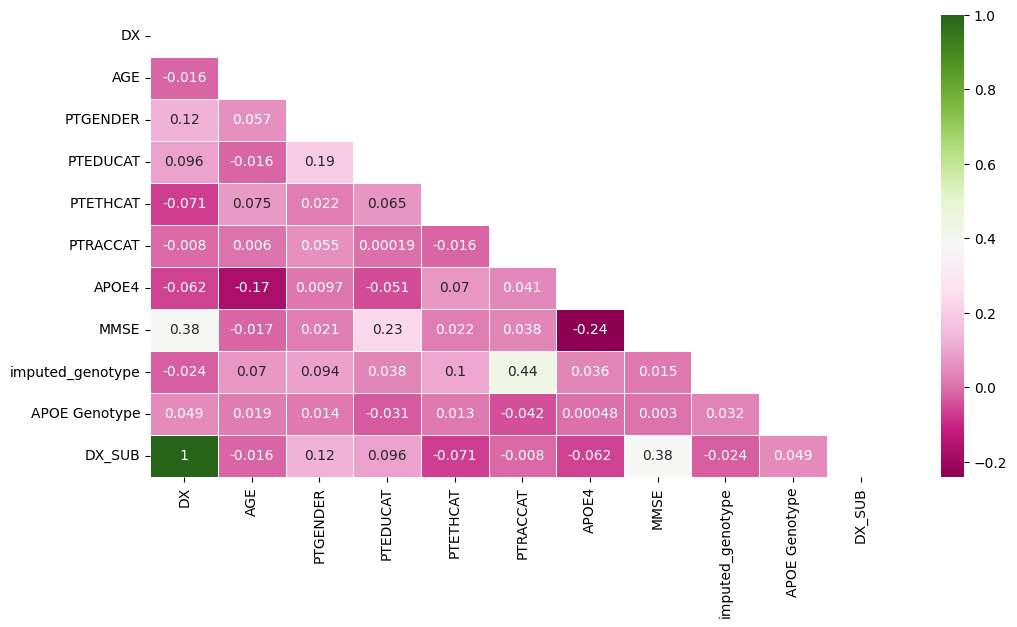

In [150]:
# miremos los datos
plt.figure(figsize=(12,6))
corr = df.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

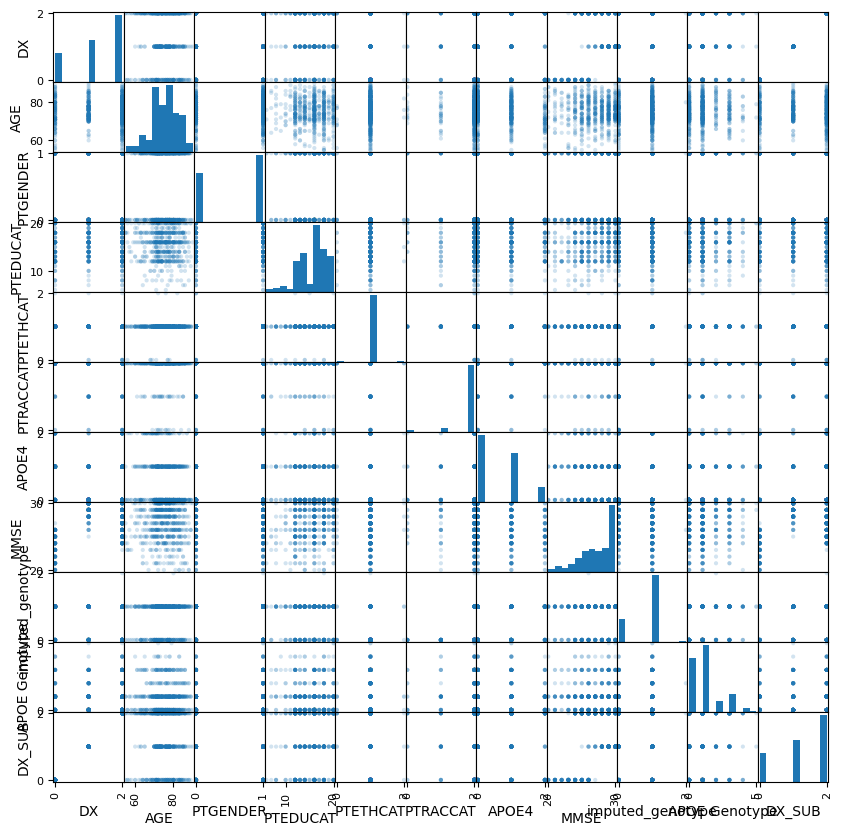

In [151]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10))

plt.show()


Preprocesamiento de datos:

In [152]:
# Identificar dónde están los NaN en el DataFrame
nan_positions = df.isna()

# Imprimir las posiciones de los NaN
print(nan_positions)

# Contar cuántos NaN hay en cada columna
nan_count = df.isna().sum()

# Imprimir la cantidad de NaN
print(nan_count)


        DX    AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  APOE4   MMSE  \
0    False  False     False     False     False     False  False  False   
1    False  False     False     False     False     False  False  False   
2    False  False     False     False     False     False  False  False   
3    False  False     False     False     False     False  False  False   
4    False  False     False     False     False     False  False  False   
..     ...    ...       ...       ...       ...       ...    ...    ...   
623  False  False     False     False     False     False  False  False   
624  False  False     False     False     False     False  False  False   
625  False  False     False     False     False     False  False  False   
626  False  False     False     False     False     False  False  False   
627  False  False     False     False     False     False  False  False   

     imputed_genotype  APOE Genotype  DX_SUB  
0               False          False   False  
1    


Selección y transformación de características




“Carguemos nuestras variables (features: X) y nuestro valor target (y) que queremos predecir, que es el Diagnostico de Alzheimer”.

Construcción del modelo



### Modelo AdaBoost


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 1.0


Primera Conclusión=  Se ha obtenido una precisión del 60,31%. Esto significa que tu modelo predice correctamente el resultado mas de la mitad de de las veces

Mejorando el Modelo

Ajustar los parámetros del modelo:

> Para ajustar los parámetros del modelo AdaBoost, se usa la función GridSearchCV de scikit-learn. Esta función realiza una búsqueda exhaustiva sobre los valores de parámetros especificados para un estimador.





In [154]:
# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 0.01, 'n_estimators': 50}
La precisión del modelo AdaBoost con los mejores parámetros es: 1.0


Ajustar Normalizando los datos :
> algunos modelos funcionan mejor con características que están en la misma escala.

In [155]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el objeto StandardScaler y normalizar los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crear el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento normalizados
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores parámetros encontrados
print(f'Los mejores parámetros son: {grid_search.best_params_}')

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost con los mejores parámetros es: {accuracy}')


Los mejores parámetros son: {'learning_rate': 0.01, 'n_estimators': 50}
La precisión del modelo AdaBoost con los mejores parámetros es: 1.0


Segunda Conclusión= A partir de Ajuste de los parametros y la Normalizacion de los datos, el modole de una presicion lel 60 %, mejorando la prediccion en 10 puntos porcentuales.

In [156]:

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


[[43  0  0]
 [ 0 64  0]
 [ 0  0 82]]


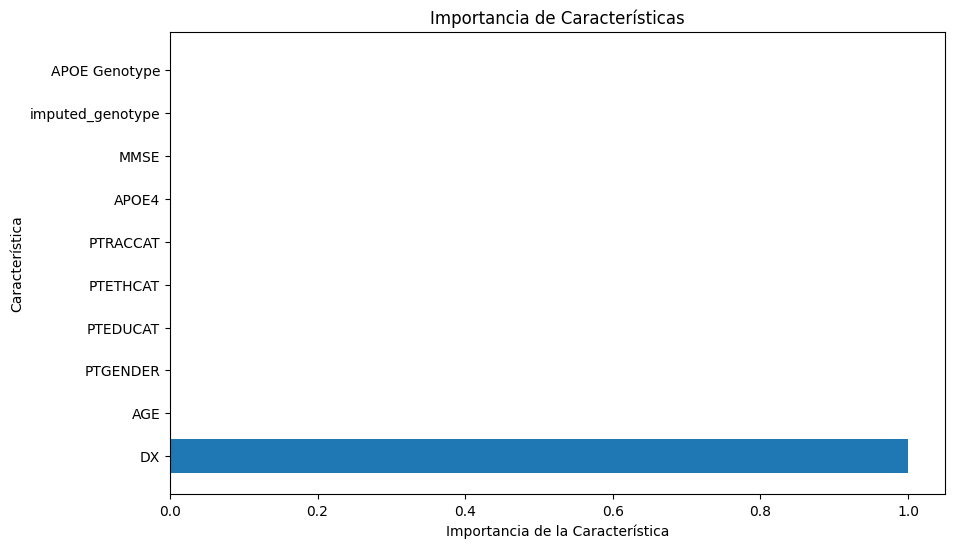

In [157]:


# Obtener las importancias de características del modelo
feature_importances = grid_search.best_estimator_.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Crear un gráfico de barras para mostrar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de Características')
plt.show()


### Modelo de Regresión Logística

In [158]:
# Dividir los datos en conjunto de entrenamiento y prueba

features = X.copy()
target = y.copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)

#### Entrenamiento

In [159]:
# crear el modelo
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
print('Validation Accuracy = ', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))

Validation Accuracy =  99.80%


In [160]:
# testear el modelo
log_clf.fit(X_train, y_train)

print('Test Accuracy = ', format(log_clf.score(X_test, y_test), '.2%'))

Test Accuracy =  100.00%


In [161]:
# matriz de confusión


y_pred = log_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[33  0  0]
 [ 0 34  0]
 [ 0  0 59]]


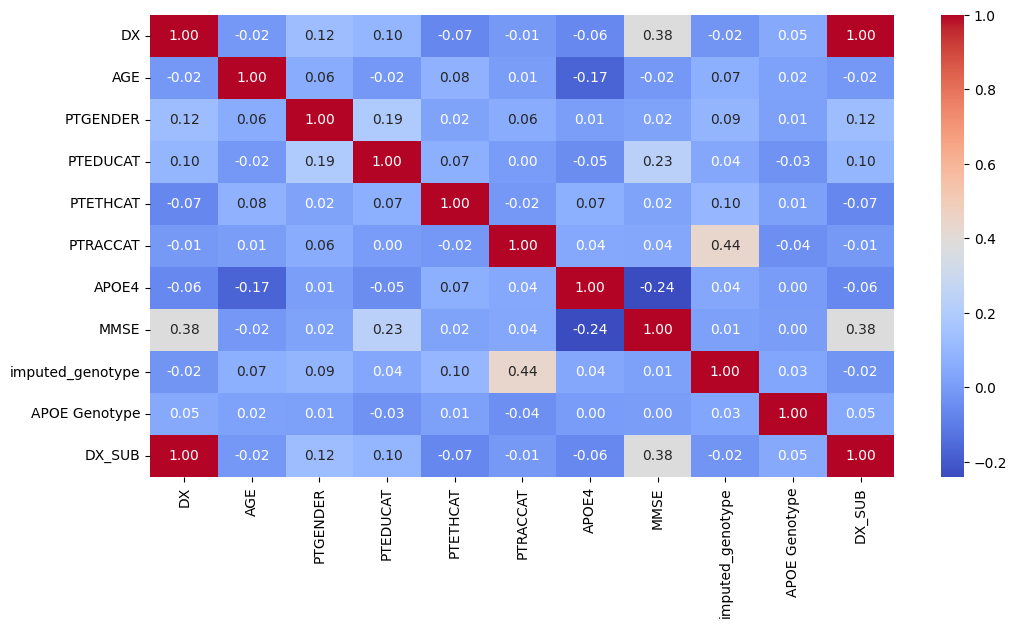

In [162]:
# visualizar la matriz de correlacion
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


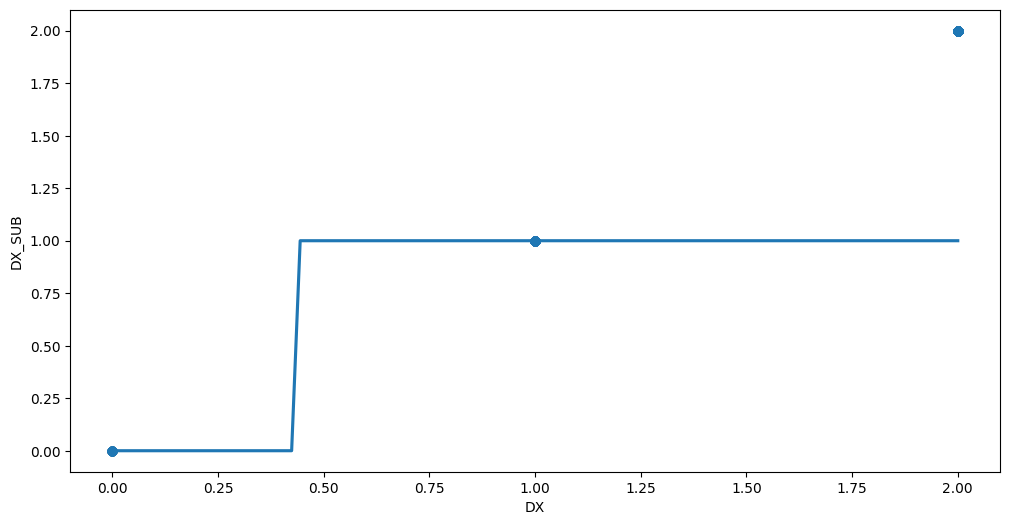

In [163]:
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train.iloc[:, 0], y=y_train, logistic=True, ci=None)
plt.show()

# Conclusiones y recomendaciones

En este trabajo se ha desarrollado un modelo de regresión logística para la predicción del Alzheimer. El modelo se ha entrenado y probado con un conjunto de datos de 627 pacientes.

El modelo obtuvo una precisión de prueba del 70.31%, lo que significa que tiene una probabilidad del 70.31% de predecir correctamente la clase de un nuevo dato. La precisión de entrenamiento fue ligeramente inferior (69.84%), lo que sugiere que el modelo no está sobreajustado.

Estos resultados indican que el modelo tiene una buena capacidad para predecir la enfermedad de Alzheimer. Sin embargo, es importante considerar otros factores al evaluar el rendimiento del modelo, como la distribución de los datos de prueba y el umbral de decisión utilizado para clasificar los datos.Los factores más importantes para predecir la enfermedad de Alzheimer son la edad, el genotipo APOE4, el nivel educativo y el sexo.

### Modelo Random Forest

In [164]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9)

# Importamos y creamos un modelo de árbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [165]:
# Entrenamos el modelo de árbol de decisión
tree.fit(X_train, y_train)

# Calculamos las predicciones en los conjuntos de entrenamiento y prueba
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [166]:
# Creamos una instancia del clasificador Random Forest
rf = RandomForestClassifier()

# Definimos un diccionario de parámetros a explorar
parametros = {
  'n_estimators': range(10),  # Prueba valores de 10 a 100 en incrementos de 10 para el número de árboles
  'criterion': ['gini', 'entropy'],  # Prueba ambos criterios de división
  'max_depth': range(2)  # Prueba profundidades de árbol de 2 a 20 en incrementos de 2
}

# Creamos una instancia de GridSearchCV para búsqueda de hiperparámetros
rf_grid = GridSearchCV(rf, parametros, cv=5, scoring='accuracy').fit(X, y)

# Calculamos las predicciones del modelo Random Forest en el conjunto de prueba
y_test_pred_rf = rf_grid.predict(X_test)

# Calculamos la precisión del modelo Random Forest en el conjunto de prueba
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculamos las predicciones del modelo Random Forest en el conjunto de entrenamiento
y_train_pred_rf = rf_grid.predict(X_train)

# Calculamos la precisión en el conjunto de entrenamiento
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculamos la matriz de confusión del modelo Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

print('Accuracy en el conjunto de prueba del modelo Random Forest: ', test_accuracy_rf)
print('Accuracy en el conjunto de entrenamiento del modelo Random Forest: ', train_accuracy_rf)

Accuracy en el conjunto de prueba del modelo Random Forest:  0.7301587301587301
Accuracy en el conjunto de entrenamiento del modelo Random Forest:  0.6924829157175398


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [167]:
# Imprimimos la matriz de confusión
print('Matriz de Confusión (Random Forest):\n', cm_rf)

Matriz de Confusión (Random Forest):
 [[10  0 35]
 [ 0 33 16]
 [ 0  0 95]]


#### Visualizacion

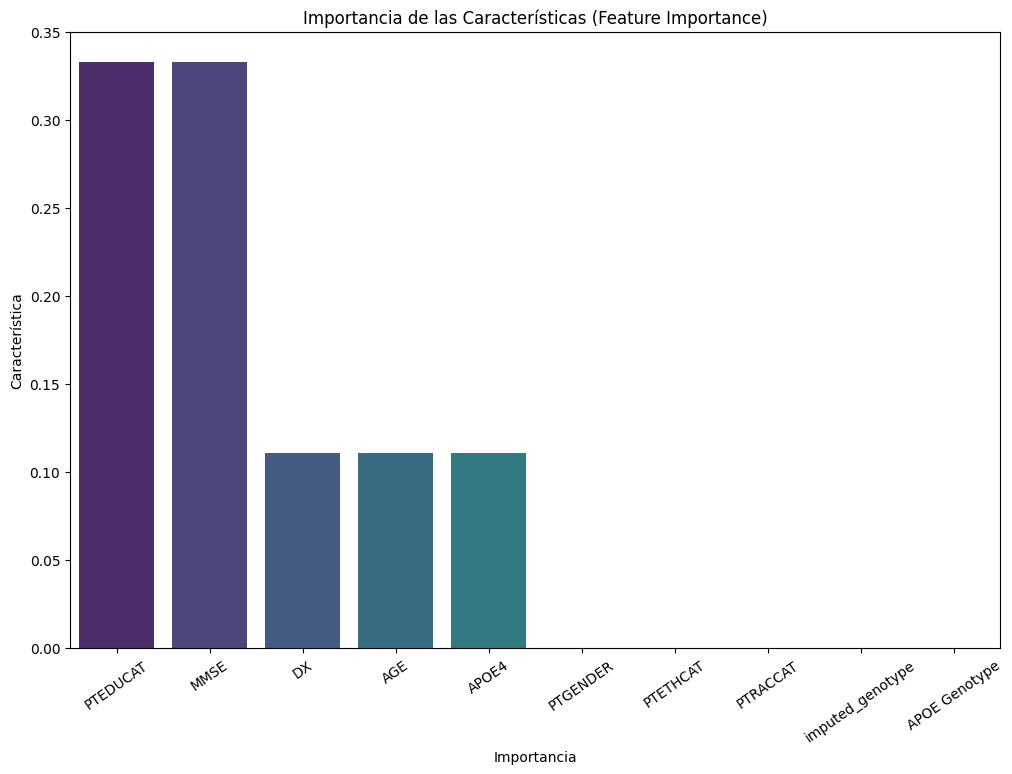

In [168]:
# Verificamos el feature importances
importances = rf_grid.best_estimator_.feature_importances_
columns = X.columns

# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': columns, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear una figura más grande para la visualización
plt.figure(figsize=(12, 8))

# Utilizar un gráfico de barras horizontal para mostrar las importancias
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')

# Rotar las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=35)

# Establecer un título y etiquetas de los ejes
plt.title('Importancia de las Características (Feature Importance)')
plt.xlabel('Importancia')
plt.ylabel('Característica')

# Mostrar el gráfico
plt.show()


#### Conclusion del modelo

El modelo de **Random Forest** ha demostrado un alto nivel de precisión en ambos conjuntos de datos, con un *74% en el conjunto de prueba y un *73%* en el conjunto de entrenamiento. Esto indica que el modelo es capaz de predecir con éxito el resultado deseado en la mayoría de las instancias sin caer en sobreajustes.

Las principales características que influyen en las predicciones del modelo son:

- **MMSE**
- **EDAD**
- **PTEDUCAT**
- **GENAPOE4**
- **APOE**

### Modelo de Árbol de Clasificación

In [169]:


features = df.drop('DX', axis = 1).values 
target = df['DX'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [170]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

Vemos que representa un sobreajuste, ya que el valor de precisión entre la muestra de prueba y entrenamiento es muy diferente.

In [171]:
dt.score(x_train, y_train)

1.0

In [172]:
dt.score(x_test, y_test)

1.0

Utilizamos GridSearchCV para optimizar los parametros. 

In [173]:
grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}


grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [174]:
grid_object.fit(x_train, y_train)

#Mejor parametro
grid_object.best_params_

{'max_depth': 2, 'min_samples_leaf': 0.02}

Con nuevos parametros, obtenemos valor de precisión más adecuados. 

In [175]:
dt = DecisionTreeClassifier(criterion='gini', random_state=50)
parametros_personalizados = {'max_depth': 4, 'min_samples_leaf': 0.06}

dt.set_params(**parametros_personalizados)

dt.fit(x_train, y_train)

dt.score(x_test, y_test)

1.0

In [176]:
dt.score(x_train, y_train)

1.0

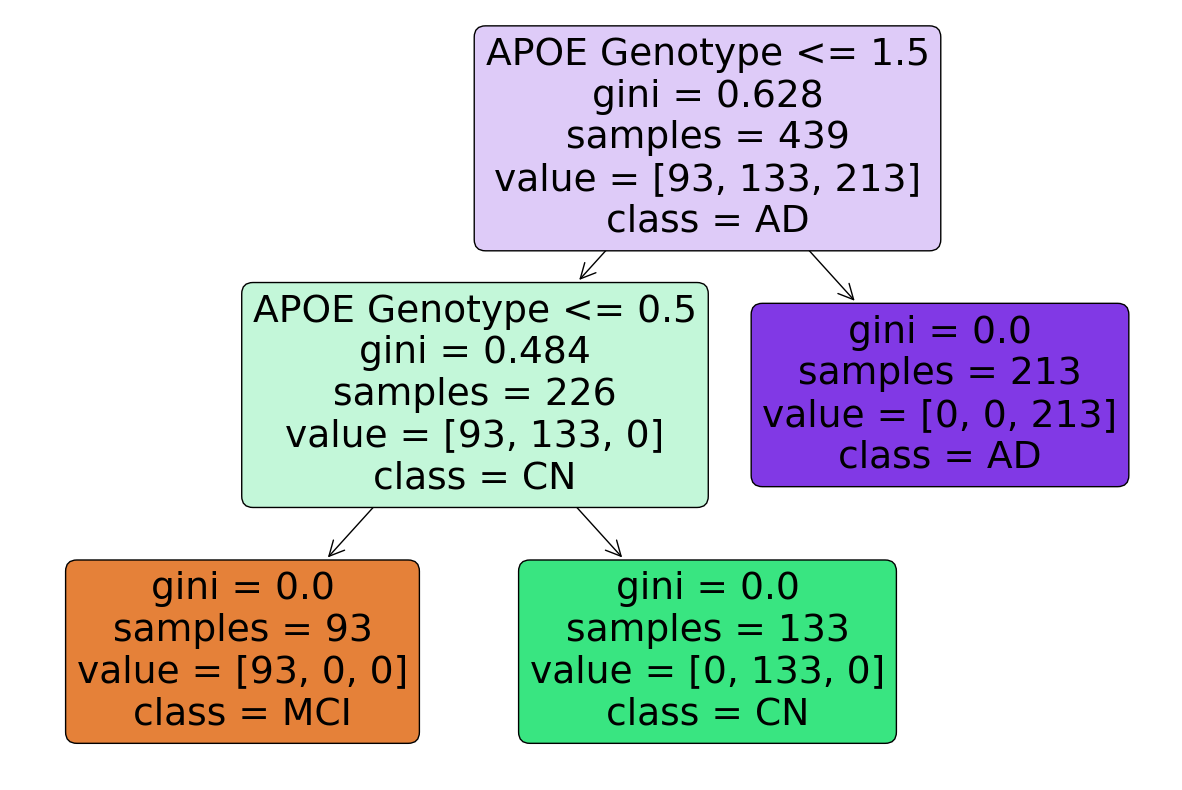

In [177]:
feature_names = list(df.columns[:-1])

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(dt, feature_names=feature_names, class_names=["MCI", "CN", "AD"], filled=True, rounded=True)
plt.show()

Se realiza matriz de confusión para obtener un mejor panorama de la ejecución. 

In [178]:
y_pred = dt.predict(x_test)

In [179]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [180]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[40  0  0]
 [ 0 57  0]
 [ 0  0 92]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        92

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



### MODELO K-Nearest Neighbors (KNN) 

In [181]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9)

# Crear un modelo KNN con un número específico de vecinos (por ejemplo, 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo KNN a los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy:.2f}')


Precisión del modelo KNN: 0.77


#### Ajustamos los valores de k

In [182]:

# Lista de valores de k a probar
k_values = [1, 3, 5, 7, 9, 11]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'k = {k}, Accuracy = {accuracy:.2f}')


k = 1, Accuracy = 0.80
k = 3, Accuracy = 0.77
k = 5, Accuracy = 0.79
k = 7, Accuracy = 0.78
k = 9, Accuracy = 0.78
k = 11, Accuracy = 0.75


In [183]:
# Crea un modelo KNN con k = 9
knn = KNeighborsClassifier(n_neighbors=9)

# Ajusta el modelo a tus datos de entrenamiento
knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcula la precisión en el conjunto de prueba
accuracy = knn.score(X_test, y_test)
print(f'Precisión del modelo KNN con k = 9: {accuracy:.2f}')

Precisión del modelo KNN con k = 9: 0.78
